# 3rd part: Image and texts, with EasyCLEF

In [3]:
import os
import ParserEasyClef
import ParserCACM
import modeles
import numpy as np
import query
import evaluation
import clusterings
import matplotlib.pyplot as plt
# Auto reload the imported modules when running cells
%load_ext autoreload 
%autoreload 2

# Constants:

srcFolder = "easyCLEF08/"

# File that contains all documents
srcFile = "easyCLEF08_text.txt"
# File that contains all relevances for queries
relevantsFile = "easyCLEF08_gt.txt"
# File that contains all queries
qryFile = "easyCLEF08_query.txt"

easyClef_txt = os.path.join(srcFolder, srcFile)
easyClef_qry = os.path.join(srcFolder, qryFile)
easyClef_rel = os.path.join(srcFolder, relevantsFile)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import indexation 
import TextRepresenter

parser = ParserEasyClef.ParserEasyClef()
stemmer =  TextRepresenter.PorterStemmer()
idx = indexation.InMemoryIndex(easyClef_txt, 
                               parser, 
                               stemmer)
all_docs_id = idx.getDocsID()
print("All docs ID (%d):" % len(all_docs_id))
print(all_docs_id)

allQueries = {}
qp = query.QueryParserCACM(easyClef_qry, easyClef_rel)
qry = qp.nextQuery()
while qry is not None:
    allQueries[int(qry.getID())] = qry
    qry = qp.nextQuery()
print("All qry ids (%d):" % len(allQueries))
print(allQueries.keys())


All docs ID (2256):
['28', '661', '662', '690', '728', '737', '1134', '1313', '1327', '1515', '1522', '1531', '1532', '1533', '1543', '1579', '1580', '1581', '1583', '1591', '1690', '1716', '1785', '1825', '1837', '1861', '1884', '1955', '1960', '1965', '1966', '1967', '1969', '1972', '2007', '2024', '2077', '2107', '2129', '2172', '2182', '2192', '2197', '2219', '2223', '2275', '2277', '2283', '2284', '2285', '2290', '2295', '2297', '2308', '2470', '2560', '2583', '2586', '2587', '2588', '2590', '2592', '2595', '2675', '2677', '2693', '2695', '2699', '2702', '2711', '2712', '2714', '2716', '2717', '2719', '2720', '2724', '2731', '2764', '2814', '2858', '2913', '3015', '3023', '3035', '3090', '3092', '3138', '3147', '3158', '3166', '3185', '3193', '3210', '3248', '3260', '3262', '3269', '3270', '3295', '3334', '3360', '3362', '3407', '3414', '3513', '3525', '3545', '3552', '3560', '3573', '3587', '3589', '3598', '3600', '3615', '3625', '3636', '3640', '3643', '3660', '3726', '3736', '3

## Test baseline for some queries

In [26]:
modele_vect = modeles.Vectoriel(idx, modeles.TfidfWeighter(idx))
wantedId = [5, 3, 18,28,60,16,34,39,44,10,52,13]
print("Searching for query", wantedId)
for qryID in wantedId :
    qry = allQueries[qryID]
    print("Query")
    print(qry)
    qry_repr = stemmer.getTextRepresentation(qry.getText())
    dict_scores = modele_vect.getScores(qry_repr)
    list_scores = [(docId, score) for docId, score in dict_scores.items()]
    irlist = evaluation.IRList(qry, list_scores)
    eval_precAtN = evaluation.PrecisionNDocuments(irlist)
    eval_CRAtN = evaluation.ClusterRecallNDocuments(irlist)
    n = 40
    print("Precision at %d docs:" % n)
    print(eval_precAtN.eval(n, verbose=True))
    print("Cluster Recall at %d docs:" % n)
    print(eval_CRAtN.eval(n, verbose=True))

    print(20 * '-')
    
print("Done.")


Searching for query [5, 3, 18, 28, 60, 16, 34, 39, 44, 10, 52, 13]
Query
Query {id=5, txt='animal swimming. Relevant images will show one or more animals (fish, birds, reptiles, etc.) swimming in a body of water. Images of people swimming in water are not relevant. Images of animals that are not swimming are not not relevant.
', relevances=[1515, 2007, 2285, 2764, 2913, 3090, 3166, 3248, 3660, 4218, 4219, 4969, 4975, 4979, 4993, 5011, 5012, 6294, 6297, 6342, 6556, 8458, 9149, 10738, 12608, 13170, 13183, 15027, 15172, 15405, 15645, 16638, 16952, 19108, 26625, 30783, 30817, 30822, 30824, 30825, 30826, 30827, 30828, 30829, 30830, 30831, 30843, 30844, 30845, 30846, 30863, 30865, 30866, 30867, 30868, 30869, 31072, 37447, 37448, 37449, 37450, 38269, 38270, 38271]}
Precision at 40 docs:
Result:  3090
Relevant, found docs = 1
Result:  15405
Relevant, found docs = 2
Result:  30828
Relevant, found docs = 3
Result:  30825
Relevant, found docs = 4
Result:  38271
Relevant, found docs = 5
Result:  3

Precision at 40 docs:
Result:  38117
Relevant, found docs = 1
Result:  38129
Result:  38096
Relevant, found docs = 2
Result:  4898
Result:  38118
Relevant, found docs = 3
Result:  38103
Result:  38230
Relevant, found docs = 4
Result:  38224
Relevant, found docs = 5
Result:  38225
Relevant, found docs = 6
Result:  38227
Relevant, found docs = 7
Result:  38223
Relevant, found docs = 8
Result:  22777
Result:  38226
Relevant, found docs = 9
Result:  38046
Relevant, found docs = 10
Result:  37894
Result:  4723
Result:  38038
Relevant, found docs = 11
Result:  38121
Relevant, found docs = 12
Result:  37274
Result:  13594
Result:  38271
Result:  38133
Relevant, found docs = 13
Result:  38166
Relevant, found docs = 14
Result:  38137
Result:  38161
Relevant, found docs = 15
Result:  22734
Result:  38036
Relevant, found docs = 16
Result:  38053
Relevant, found docs = 17
Result:  38054
Relevant, found docs = 18
Result:  38084
Relevant, found docs = 19
Result:  38269
Result:  38045
Relevant, found

Precision at 40 docs:
Result:  16098
Result:  3158
Result:  5109
Result:  26718
Relevant, found docs = 1
Result:  26720
Relevant, found docs = 2
Result:  2858
Result:  4036
Result:  26629
Relevant, found docs = 3
Result:  26524
Relevant, found docs = 4
Result:  7407
Relevant, found docs = 5
Result:  4927
Result:  3360
Result:  3362
Result:  4931
Result:  728
Relevant, found docs = 6
Result:  7728
Relevant, found docs = 7
Result:  1967
Relevant, found docs = 8
Result:  37354
Result:  13546
Relevant, found docs = 9
Result:  23241
Result:  13547
Relevant, found docs = 10
Result:  1134
Result:  1313
Result:  17947
Result:  4049
Result:  30500
Result:  31430
Result:  19115
Result:  1327
Result:  40328
Result:  2675
Relevant, found docs = 11
Result:  20918
Result:  4740
Result:  30501
Result:  30504
Result:  39699
Result:  38216
Result:  38217
Result:  31431
Result:  37355
0.275
Cluster Recall at 40 docs:
There are 9 clusters for this query
Result: 26718, cluster: 1
Result: 26720, cluster: 1

## Test of greedy

In [34]:
CR

[0.69078818725557856,
 0.69078818725557856,
 0.69078818725557856,
 0.70269294916034042,
 0.66995485392224519,
 0.67312514377731769,
 0.69544657234874618,
 0.69514463998159659,
 0.6987678283873936,
 0.6796166896710375,
 0.61734817115251894]

In [57]:
CR

[0.69078818725557856,
 0.69078818725557856,
 0.69078818725557856,
 0.70269294916034042,
 0.66995485392224519,
 0.67312514377731769,
 0.69544657234874618,
 0.69514463998159659,
 0.6987678283873936,
 0.6796166896710375,
 0.59]

In [35]:
PR

[0.26773157538877618,
 0.27189824205544283,
 0.27018255578093303,
 0.27629732927653822,
 0.27421399594320489,
 0.29491210277214336,
 0.30108181203515888,
 0.3290272143340095,
 0.37664807302231235,
 0.44296399594320485,
 0.48923681541582154]

In [53]:
PR_baseline = [0.49]*len(PR)
PR_baseline
CR_baseline = [0.59]*len(CR)
CR_baseline

[0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59]

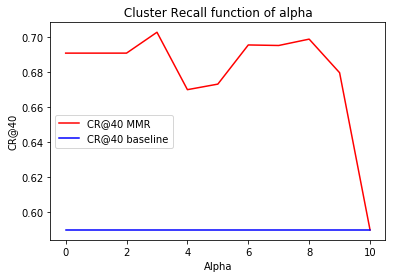

In [62]:
import matplotlib.pyplot as plt
interval = range(len(CR))
plt.plot(interval, [CR[i] for i in interval],color = "red",  label = "CR@40 MMR")
plt.plot(interval, [CR_baseline[i] for i in interval],color = "blue",  label = "CR@40 baseline")
plt.title(" Cluster Recall function of alpha ")
plt.xlabel("Alpha")
plt.ylabel("CR@40")
plt.legend()
plt.show() 

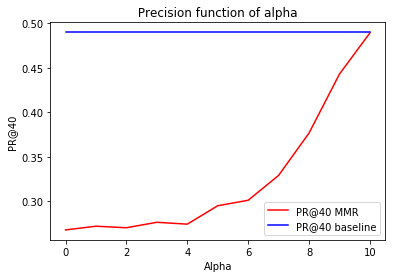

In [61]:
import matplotlib.pyplot as plt
#interval = range(len(PR))
plt.plot(interval, [i for i in PR],color = "red",  label = "PR@40 MMR")
plt.plot(interval, [j for j in PR_baseline],color = "blue",  label = "PR@40 baseline")
plt.title(" Precision function of alpha ")
plt.xlabel("Alpha")
plt.ylabel("PR@40")
plt.legend()
plt.show()

In [60]:
alpha = 0.8
prGreedy = modeles.GreedyAlgorithm(idx, modele_vect, alpha, nDocs=100)

wantedId = [5, 3, 18,28,60,16,34,39,44,10,52,13]
print("Searching for query", wantedId)
for qryID in wantedId:
    qry = allQueries[qryID]
    print("Query")
    print(qry)
    qry_repr = stemmer.getTextRepresentation(qry.getText())
    ranking = prGreedy.getRanking(qry_repr, verbose=True)
    irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
    eval_precAtN = evaluation.PrecisionNDocuments(irlist)
    eval_CRAtN = evaluation.ClusterRecallNDocuments(irlist)
    n = 40
    print("Precision at %d docs:" % n)
    print(eval_precAtN.eval(n, verbose=True))
    #prec.append(eval_precAtN.eval(n, verbose=True))
    print("Cluster Recall at %d docs:" % n)
    print(eval_CRAtN.eval(n, verbose=True))
    #rec.append(eval_CRAtN.eval(n, verbose=True))

    print(20 * '-')
#PR.append(np.mean(prec))
#CR.append(np.mean(rec))


print("Done.")


Searching for query [5, 3, 18, 28, 60, 16, 34, 39, 44, 10, 52, 13]
Query
Query {id=5, txt='animal swimming. Relevant images will show one or more animals (fish, birds, reptiles, etc.) swimming in a body of water. Images of people swimming in water are not relevant. Images of animals that are not swimming are not not relevant.
', relevances=[1515, 2007, 2285, 2764, 2913, 3090, 3166, 3248, 3660, 4218, 4219, 4969, 4975, 4979, 4993, 5011, 5012, 6294, 6297, 6342, 6556, 8458, 9149, 10738, 12608, 13170, 13183, 15027, 15172, 15405, 15645, 16638, 16952, 19108, 26625, 30783, 30817, 30822, 30824, 30825, 30826, 30827, 30828, 30829, 30830, 30831, 30843, 30844, 30845, 30846, 30863, 30865, 30866, 30867, 30868, 30869, 31072, 37447, 37448, 37449, 37450, 38269, 38270, 38271]}
Precision at 40 docs:
Result:  3090
Relevant, found docs = 1
Result:  30828
Relevant, found docs = 2
Result:  38271
Relevant, found docs = 3
Result:  15405
Relevant, found docs = 4
Result:  3525
Result:  11330
Result:  26625
Releva

Precision at 40 docs:
Result:  11341
Relevant, found docs = 1
Result:  8069
Relevant, found docs = 2
Result:  7952
Relevant, found docs = 3
Result:  6839
Relevant, found docs = 4
Result:  24707
Relevant, found docs = 5
Result:  9351
Relevant, found docs = 6
Result:  26937
Result:  4720
Relevant, found docs = 7
Result:  11490
Relevant, found docs = 8
Result:  9778
Relevant, found docs = 9
Result:  26942
Relevant, found docs = 10
Result:  12853
Relevant, found docs = 11
Result:  11108
Relevant, found docs = 12
Result:  1716
Relevant, found docs = 13
Result:  15656
Result:  4749
Relevant, found docs = 14
Result:  26186
Relevant, found docs = 15
Result:  19304
Relevant, found docs = 16
Result:  11474
Relevant, found docs = 17
Result:  14558
Relevant, found docs = 18
Result:  7577
Relevant, found docs = 19
Result:  37250
Result:  24924
Relevant, found docs = 20
Result:  10098
Relevant, found docs = 21
Result:  737
Result:  7133
Result:  7532
Relevant, found docs = 22
Result:  8394
Relevant,

Precision at 40 docs:
Result:  31295
Result:  31172
Result:  40213
Result:  31294
Result:  30930
Result:  30769
Result:  31296
Result:  31499
Result:  11170
Result:  39547
Relevant, found docs = 1
Result:  39849
Result:  3545
Result:  40260
Result:  40103
Result:  7910
Result:  30618
Relevant, found docs = 2
Result:  31396
Result:  38265
Result:  40171
Result:  32249
Result:  30488
Relevant, found docs = 3
Result:  39516
Result:  38919
Result:  39199
Result:  16574
Result:  9136
Result:  30898
Result:  31870
Relevant, found docs = 4
Result:  30768
Result:  31297
Result:  1591
Result:  6267
Result:  10810
Result:  24320
Result:  40215
Result:  7484
Result:  1837
Result:  40216
Result:  40261
Result:  40173
0.1
Cluster Recall at 40 docs:
There are 15 clusters for this query
Result: 39547, cluster: 2
Result: 30618, cluster: 8
Result: 30488, cluster: 13
Result: 31870, cluster: 2
0.2
--------------------
Query
Query {id=10, txt='destinations in Venezuela. Relevant images will show tourist d

## Test of clustering

In [10]:
kmeans = clusterings.KMeansClustering()
meanshift = clusterings.MeanShiftClustering()

prCluster = modeles.PRClustering(idx, modele_vect, meanshift, nDocs=200)

wantedId = [5, 3]
print("Searching for query", wantedId)
for qryID in wantedId:
    qry = allQueries[qryID]
    print("Query")
    print(qry)
    qry_repr = stemmer.getTextRepresentation(qry.getText())
    %time ranking = prCluster.getRanking(qry_repr, Nclusters=None, verbose=True)
    irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
    eval_precAtN = evaluation.PrecisionNDocuments(irlist)
    eval_CRAtN = evaluation.ClusterRecallNDocuments(irlist)
    n = 20
    print("Precision at %d docs:" % n)
    print(eval_precAtN.eval(n, verbose=True))
    print("Cluster Recall at %d docs:" % n)
    print(eval_CRAtN.eval(n, verbose=True))

    print(20 * '-')
    
print("Done.")


Searching for query [5, 3]
Query
Query {id=5, txt='animal swimming. Relevant images will show one or more animals (fish, birds, reptiles, etc.) swimming in a body of water. Images of people swimming in water are not relevant. Images of animals that are not swimming are not not relevant.
', relevances=[1515, 2007, 2285, 2764, 2913, 3090, 3166, 3248, 3660, 4218, 4219, 4969, 4975, 4979, 4993, 5011, 5012, 6294, 6297, 6342, 6556, 8458, 9149, 10738, 12608, 13170, 13183, 15027, 15172, 15405, 15645, 16638, 16952, 19108, 26625, 30783, 30817, 30822, 30824, 30825, 30826, 30827, 30828, 30829, 30830, 30831, 30843, 30844, 30845, 30846, 30863, 30865, 30866, 30867, 30868, 30869, 31072, 37447, 37448, 37449, 37450, 38269, 38270, 38271]}

Base ranking: ['3090', '15405', '30828', '30825', '38271', '30827', '30869', '30866', '30824', '3525', '30817', '30822', '30830', '30865', '3166', '30831', '30826', '26625', '9331', '35644', '19114', '30845', '30863', '15645', '30829', '17836', '23052', '11330', '26709'


Base ranking: ['3407', '3414', '4815', '38216', '38217', '38218', '38219', '38221', '38222', '35780', '4759', '6246', '21221', '4927', '5109', '38265', '35884', '35885', '25966', '30334', '38898', '39169', '4723', '17947', '15194', '20357', '14520', '15973', '27353', '28', '19115', '11230', '4533', '19194', '4089', '30011', '19135', '21319', '4900', '21222', '39131', '4946', '23241', '15763', '30843', '20356', '2858', '4531', '4642', '37237', '37244', '37191', '11170', '24320', '4948', '22777', '4812', '19211', '10657', '4898', '10730', '10999', '37194', '23108', '37184', '40542', '27510', '39133', '15330', '6973', '37192', '17550', '38129', '3147', '31430', '16574', '27322', '40328', '40427', '31398', '37636', '35844', '36035', '39516', '10810', '40571', '31172', '19198', '40570', '31431', '40357', '40426', '16993', '1591', '27440', '38636', '16819', '37354', '20348', '20349', '35783', '31396', '39358', '9926', '23052', '27682', '19259', '32861', '39513', '39514', '39515', '13409', '

## Plot for one query:

Query:  Query {id=23, txt='sport photos from California. Relevant images will depict sports activities in the US state of California. Both sporting competitions and sport for recreation, fun or as a hobby are relevant. Competitions outside of California are not relevant. Images from California that are not sport are also not relevant.
', relevances=[37411, 37416, 37417, 37420, 37477, 37478, 37483, 37488, 37489, 37493, 37496, 37497, 37498, 37499, 37500, 37501, 37502, 37504, 37506, 37507, 37508, 37509, 37510, 37511, 37513, 37515, 37516, 37518, 37519, 37520, 37521, 37527, 37528, 37529, 37530, 37531, 37532, 37533, 37534, 38004, 38005, 38006, 38007, 38008, 38009, 38011, 38012, 38013, 38014, 38015, 38016, 38019, 38020, 38021, 38024, 38027, 38028, 38029, 38030, 38096, 38103, 38129, 38192, 38193, 38194, 38197, 38198, 38199, 38200, 38223, 38224, 38225, 38226, 38227, 38230, 38241, 38242, 38244, 38245, 38246, 38247]}


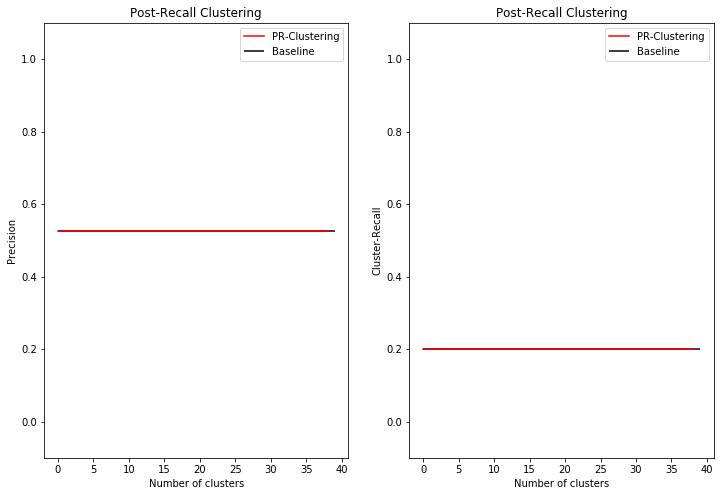

Query:  Query {id=15, txt='night shots of cathedrals. Relevant images will show churches or cathedrals at night: the building is illuminated and/or the background is black. Images of cathedrals or churches during the day are not relevant. Other night shots without cathedrals are not relevant.
', relevances=[4642, 4812, 4901, 6629, 6636, 6857, 6946, 7947, 8054, 8539, 9199, 9769, 10649, 11512, 11957, 14421, 15809, 15827, 17308, 18052, 18505, 19031, 22874, 23632, 23959]}


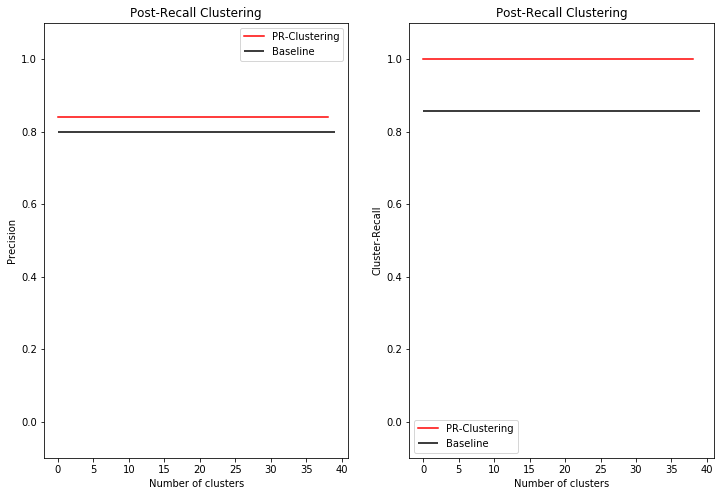

Query:  Query {id=18, txt='sport stadium outside Australia. Relevant images will show sport stadia anywhere in the world but Australia. This includes interior (grandstands with or without spectators, sports field) and exterior views. Stadia in Australia are not relevant. Buildings outside of Australia or stadia that are not used for sports are not relevant.
', relevances=[3360, 3362, 4036, 11015, 11584, 15400, 15595, 17362, 18651, 19260, 24385, 26090, 30015, 30016, 30017, 35788, 35789, 35792, 35793, 35794, 35795, 35807, 35811, 35812, 35866, 35867, 35868, 35869, 35870, 35871, 35874, 37357, 37406, 38144, 38192, 38194, 38197, 38198, 38199, 38200, 38223, 38224, 38225, 38226, 38227]}


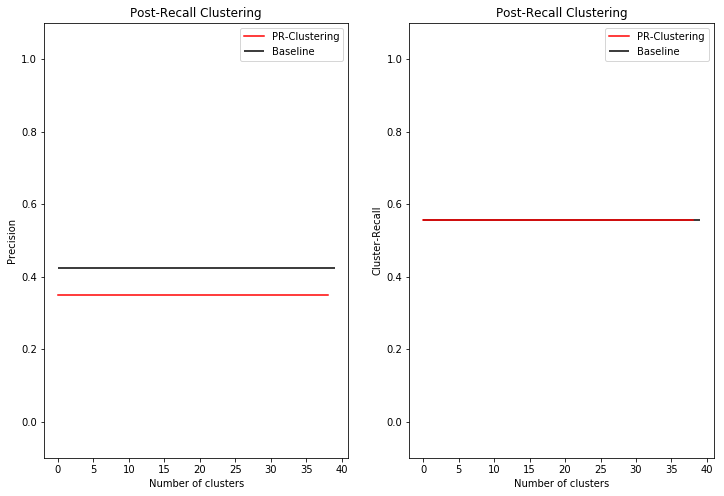

Query:  Query {id=35, txt='bird flying. Relevant images will show one or many birds in the act of flying. Birds that are not flying are not relevant. Other flying objects that are not birds are not relevant either.
', relevances=[1531, 1532, 1533, 1581, 2024, 2172, 2714, 2814, 3035, 3092, 3138, 3525, 3552, 3560, 3864, 5039, 5142, 5155, 6401, 6500, 6583, 6639, 6924, 7346, 7430, 7654, 7705, 7856, 7995, 8035, 8326, 8575, 8666, 8939, 9151, 9544, 9696, 9901, 10799, 11269, 11507, 11519, 11648, 11734, 11897, 12097, 12495, 12755, 13183, 13214, 13409, 13558, 13930, 15075, 15699, 15964, 16005, 16305, 16767, 16928, 17836, 19575, 20282, 21420, 22235, 23297, 23329, 23704, 23908, 24202, 24320, 24412, 25648, 26555, 26912, 35624, 37895, 38914, 38915, 38916, 38925, 39184, 39513, 39514, 39515, 39516, 39519]}


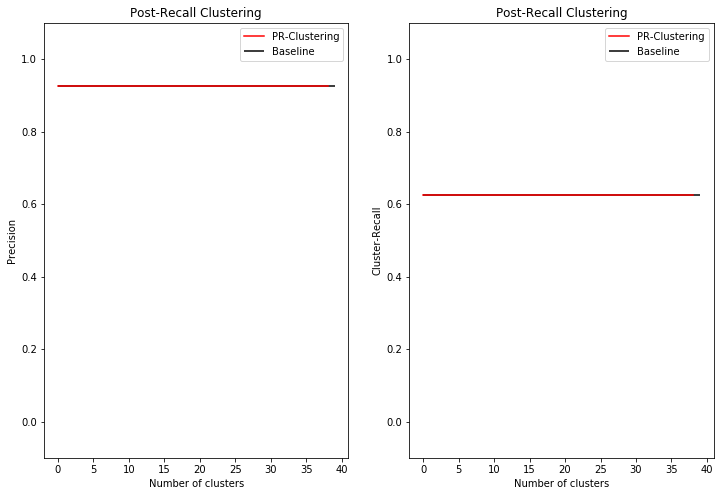

Query:  Query {id=16, txt='people in San Francisco. Relevant images will show the Californian city of San Francisco with at least one person. Images of San Francisco without people are not relevant. Images of people not in San Francisco are not relevant.
', relevances=[38033, 38034, 38035, 38036, 38038, 38040, 38041, 38042, 38043, 38044, 38045, 38046, 38052, 38053, 38054, 38059, 38068, 38073, 38077, 38084, 38086, 38087, 38096, 38117, 38118, 38121, 38124, 38133, 38140, 38144, 38146, 38150, 38152, 38160, 38161, 38166, 38167, 38169, 38174, 38182, 38216, 38217, 38218, 38219, 38221, 38222, 38223, 38224, 38225, 38226, 38227, 38230, 38231, 38263, 38264, 38265]}


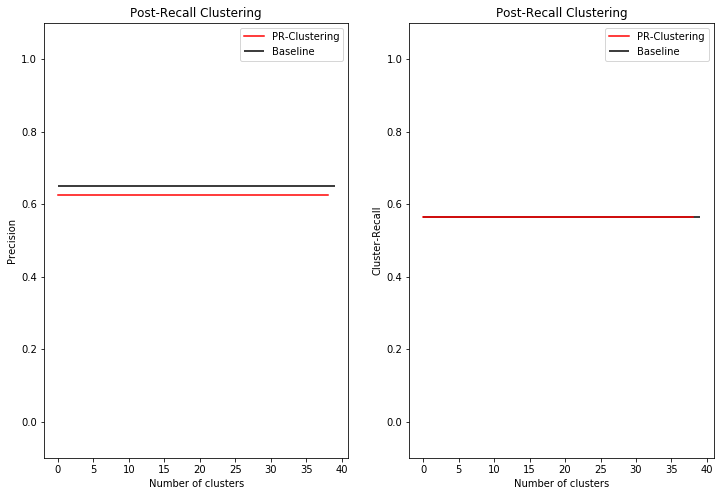

Query:  Query {id=55, txt='drawings in Peruvian deserts. Relevant images will show drawings that were found in deserts in Peru. This includes the Nazca-Lines near Nazca, the Candelabro in Paracas or the Petroglyphs of Toro Muerto near Corire. Images in which the drawings are clearly visible are relevant. Images of drawings that are not in Peruvian deserts are not relevant, and images of drawings that are not visible in the image are not relevant either.
', relevances=[4433, 5096, 5164, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 6455, 6689, 6795, 7156, 7157, 7486, 7605, 7720, 7847, 7987, 8016, 8143, 8152, 8260, 8319, 8323, 8574, 8665, 8738, 8765, 8803, 8876, 8880, 8941, 8943, 9663, 9667, 9929, 9933, 10134, 10202, 10295, 10387, 10671, 10674, 11258, 11330, 11726, 11794, 11947, 12489, 13144, 13331, 13606, 13721, 13911, 14386, 14468, 14580, 15479, 16205, 16209, 16475, 16925, 18832, 20629, 21166, 21167, 21615, 21760, 22004, 22039, 22613, 23243, 23533, 24398, 24427, 25526, 25616, 26163, 26709]

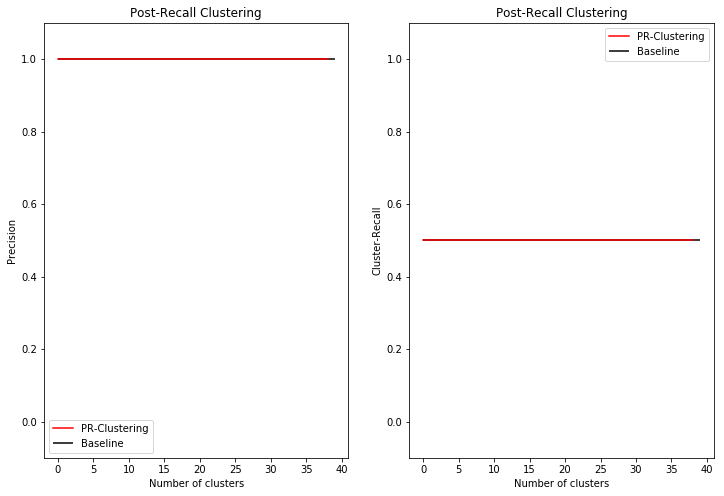

Query:  Query {id=44, txt='mountains on mainland Australia. Relevant images will show mountains on mainland Australia. Images of mountains of Australian islands (e.g. Tasmania, Kangaroo Island, etc) are not relevant. Mountains outside Australia are not relevant. Photos from Australia with no mountains are not relevant.
', relevances=[30243, 30245, 30246, 30353, 30358, 30360, 30361, 30413, 30426, 30431, 30433, 30449, 30456, 30457, 30458, 30459, 30461, 30462, 30488, 30494, 30496, 30608, 30618, 30641, 30642, 30658, 30696, 30919, 30971, 30975, 30976, 30977, 31111, 31112, 31113, 31116, 31830, 31832, 31835, 31836, 31837, 31838, 31839, 31841, 31844, 31846, 31847, 31848, 31849, 31850, 31851, 31852, 31854, 31855, 31857, 31863, 31864, 31868, 31869, 31870, 31879, 31882, 31883, 31884, 31887, 31897, 32646, 32648, 32656, 32666, 32670, 32672, 33362, 33370, 33374, 33378, 33379, 33393, 38928, 38929, 38930, 38978, 38981, 38997, 39007, 39023, 39024, 39025, 39027, 39029, 39032, 39036, 39037, 39038, 39039,

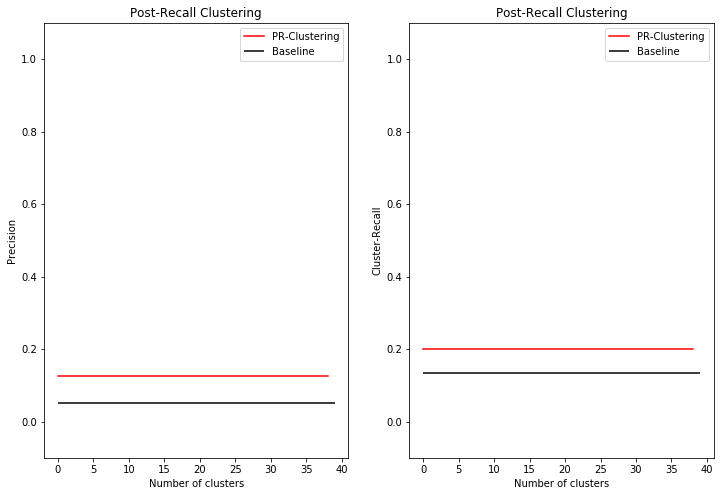

Query:  Query {id=20, txt='close-up photograph of an animal. Relevant images will show close-up pictures of animals. Close-up pictures of humans (although technically speaking we are animals as well!) are not relevant. Photos with more than one animal are not relevant.
', relevances=[1690, 2024, 2284, 2290, 3138, 3193, 3545, 3625, 3636, 3640, 3643, 3895, 4022, 4224, 4234, 4565, 4570, 4849, 4856, 4860, 4991, 6266, 6267, 6270, 6271, 6275, 6284, 6288, 6292, 6447, 6639, 7034, 7060, 7564, 8298, 8489, 9144, 9159, 9334, 9402, 9556, 9584, 10729, 10730, 10811, 10965, 11172, 11224, 11269, 11481, 12755, 15027, 15382, 15969, 16574, 16840, 16944, 16949, 16954, 17843, 18492, 18942, 25541, 25543, 25674, 26911, 27050, 27054, 40224, 40675, 40688]}


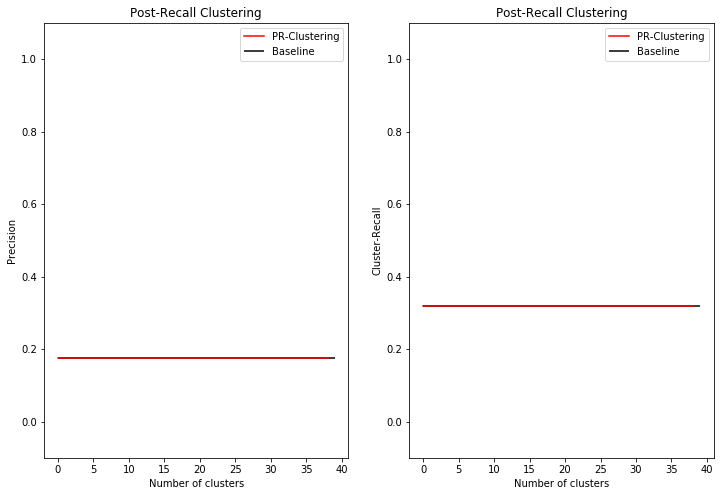

Query:  Query {id=24, txt='snowcapped building in Europe. Relevant images will show snow-covered buildings in Europe. It must be clear in the image that there is snow on at least one part of the building. Images of buildings with no snow on them (or snow just lying around the building) are not relevant. Snowy buildings outside of Europe are not relevant. Buildings from the Asian part of Russia (Siberia) are not relevant either.
', relevances=[34129, 34130, 34131, 34133, 34134, 34135, 34136, 34137, 34138, 34139, 34140, 34143, 34153, 34154, 34156, 34157, 34158, 34162, 34164, 34165, 34166, 37167, 37172, 37182, 37184, 37186, 37191, 37192, 37193, 37208, 37354, 37355, 37356, 37358, 37365, 37366, 37368, 37369, 37371, 37372, 37374, 37375, 37376, 37378, 37379, 37380, 37382, 37383, 37384, 37385, 37386, 37387, 37388, 37389, 37390, 37391, 37392, 37393, 37394, 37405]}


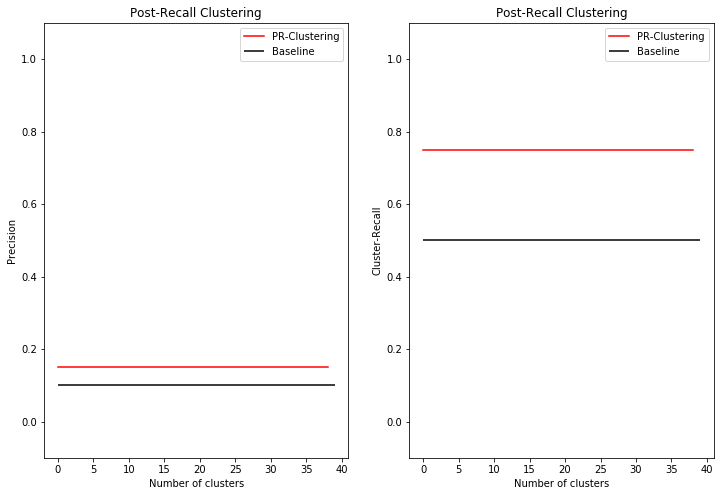

Query:  Query {id=6, txt='straight road in the USA. Relevant images will show a straight road or highway (either empty or with traffic) in the United States of America. A road is considered to be a straight road if there is no curve visible in the image. Images with roads with a curve are not relevant. Images with straight roads that are not in the USA are not relevant. Images with roads too short to determine whether they are straight or not (like side views) are not relevant.
', relevances=[37515, 37516, 37530, 37535, 37567, 37568, 37569, 37576, 37588, 37589, 37591, 37595, 37596, 37597, 37599, 37601, 37602, 37603, 37604, 37606, 37609, 37610, 37618, 37626, 37627, 37631, 37632, 37633, 37636, 37642, 37646, 37657, 37660, 37661, 37663, 37665, 37667, 37668, 37675, 37677, 37678, 37710, 37712, 37713, 37714, 37715, 37717, 37718, 37719, 37720, 37721, 37722, 37723, 37730, 37731, 37735, 37737, 37739, 37743, 37744, 37746, 37747, 37748, 37749, 37751, 37752, 37753, 37755, 37761, 37765, 37772, 37773

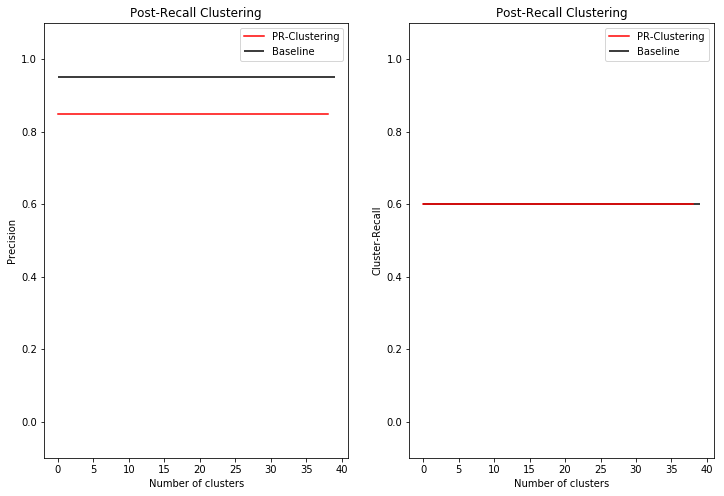

Done.


In [11]:
randQueries = np.random.choice(list(allQueries.values()), size=10, replace=False)
at = 40
nClusterRange = range(1, at)

for qry in randQueries:
    print("Query: ",qry)
    qry_repr = stemmer.getTextRepresentation(qry.getText())

    # Compute the baseline scores:
    dict_scores = modele_vect.getScores(qry_repr)
    list_scores = [(docId, score) for docId, score in dict_scores.items()]
    irlist = evaluation.IRList(qry, list_scores)
    eval_precAtN = evaluation.PrecisionNDocuments(irlist)
    eval_CRAtN = evaluation.ClusterRecallNDocuments(irlist)
    baseline_prec = eval_precAtN.eval(at, verbose=False)
    baseline_CR   = eval_CRAtN.eval(at, verbose=False)
    #print("Baseline: prec=%f, CR=%f" % (baseline_prec, baseline_CR))

    # Compute the post-retrieval clustering:
    precisions = []
    CRs = []
    for nCluster in nClusterRange:

        ranking = prCluster.getRanking(qry_repr, Nclusters=nCluster)
        irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
        eval_precAtN = evaluation.PrecisionNDocuments(irlist)
        eval_CRAtN = evaluation.ClusterRecallNDocuments(irlist)
        prec = eval_precAtN.eval(at)
        CR = eval_CRAtN.eval(at, verbose=False)
        precisions.append(prec)
        CRs.append(CR)
        #print("%d clusters: prec=%f, CR=%f" % (nCluster, prec, CR))

    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.hlines(baseline_prec, xmin=0, xmax=at-1, label="Baseline")
    plt.plot(precisions, "r", label="PR-Clustering")
    plt.legend()
    plt.title("Post-Recall Clustering")
    plt.xlabel("Number of clusters")
    plt.ylabel("Precision")
    plt.ylim([-0.1, 1.1])

    plt.subplot(1,2,2)
    plt.hlines(baseline_CR, xmin=0, xmax=at-1, label="Baseline")
    plt.plot(CRs, "r", label="PR-Clustering")
    plt.legend()
    plt.title("Post-Recall Clustering")
    plt.xlabel("Number of clusters")
    plt.ylabel("Cluster-Recall")
    plt.ylim([-0.1, 1.1])

    plt.show()

print("Done.")

# Benchmark

In [12]:
at = 40
benchmarkQueries = np.random.choice(list(allQueries.values()), size=10, replace=False)

prCluster = modeles.PRClustering(idx, baseModel=modele_vect, cluster=kmeans, nDocs=300)
baseline_prec = []
baseline_CR = []
prCluster_prec = []
prCluster_CR = []

print("Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta")
print(70*'=')

for qry in benchmarkQueries:
    qry_repr = stemmer.getTextRepresentation(qry.getText())

    # Compute the baseline scores:
    dict_scores = modele_vect.getScores(qry_repr)
    list_scores = [(docId, score) for docId, score in dict_scores.items()]
    irlist = evaluation.IRList(qry, list_scores)
    basePrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    baseCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    baseline_prec.append(basePrec)
    baseline_CR.append(baseCR)
    
    # Compute the post-retrieval clustering:
    ranking = prCluster.getRanking(qry_repr, Nclusters=None, maxClusters=20)
    irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
    prclusterPrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    prclusterCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    prCluster_prec.append(prclusterPrec)
    prCluster_CR.append(prclusterCR)
    print("%5s &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (qry.getID(), basePrec, prclusterPrec, prclusterPrec-basePrec, 
                        baseCR, prclusterCR, prclusterCR-baseCR))

        
print(70*'=')
meanBasePrec = np.mean(baseline_prec)
meanBaseCR = np.mean(baseline_CR)
meanPrcPrec = np.mean(prCluster_prec)
meanPrcCR = np.mean(prCluster_CR)
print("Mean  &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (meanBasePrec, meanPrcPrec, meanPrcPrec-meanBasePrec,
           meanBaseCR, meanPrcCR, meanPrcCR-meanBaseCR))    
print("Done.")

Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta
   31 &    0.88   &   0.28   &  -0.60 &  0.80  & 0.40  &  -0.40 \\
   40 &    0.42   &   0.28   &  -0.15 &  0.36  & 0.36  &   0.00 \\
    2 &    0.33   &   0.17   &  -0.17 &  0.60  & 0.40  &  -0.20 \\
   56 &    0.61   &   0.36   &  -0.25 &  0.60  & 0.60  &   0.00 \\
   10 &    0.40   &   0.30   &  -0.10 &  0.17  & 0.26  &   0.09 \\
   52 &    0.69   &   0.24   &  -0.45 &  0.71  & 0.57  &  -0.14 \\
   35 &    0.93   &   0.47   &  -0.45 &  0.62  & 0.62  &   0.00 \\
   12 &    0.53   &   0.53   &   0.00 &  1.00  & 1.00  &   0.00 \\
   21 &    1.00   &   0.50   &  -0.50 &  1.00  & 0.88  &  -0.12 \\
   59 &    0.38   &   0.27   &  -0.12 &  1.00  & 1.00  &   0.00 \\
Mean  &    0.62   &   0.34   &  -0.28 &  0.69  & 0.61  &  -0.08 \\
Done.


## With MeanShift

In [13]:

at = 40

prCluster = modeles.PRClustering(idx, baseModel=modele_vect, cluster=meanshift, nDocs=300)
baseline_prec = []
baseline_CR = []
prCluster_prec = []
prCluster_CR = []

print("Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta")
print(70*'=')

for qry in benchmarkQueries:
    qry_repr = stemmer.getTextRepresentation(qry.getText())

    # Compute the baseline scores:
    dict_scores = modele_vect.getScores(qry_repr)
    list_scores = [(docId, score) for docId, score in dict_scores.items()]
    irlist = evaluation.IRList(qry, list_scores)
    basePrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    baseCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    baseline_prec.append(basePrec)
    baseline_CR.append(baseCR)
    
    # Compute the post-retrieval clustering:
    ranking = prCluster.getRanking(qry_repr, Nclusters=None, maxClusters=20)
    irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
    prclusterPrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    prclusterCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    prCluster_prec.append(prclusterPrec)
    prCluster_CR.append(prclusterCR)
    print("%5s &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (qry.getID(), basePrec, prclusterPrec, prclusterPrec-basePrec, 
                        baseCR, prclusterCR, prclusterCR-baseCR))

        
print(70*'=')
meanBasePrec = np.mean(baseline_prec)
meanBaseCR = np.mean(baseline_CR)
meanPrcPrec = np.mean(prCluster_prec)
meanPrcCR = np.mean(prCluster_CR)
print("Mean  &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (meanBasePrec, meanPrcPrec, meanPrcPrec-meanBasePrec,
           meanBaseCR, meanPrcCR, meanPrcCR-meanBaseCR))    
print("Done.")

Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta
   31 &    0.88   &   0.88   &   0.00 &  0.80  & 0.80  &   0.00 \\
   40 &    0.42   &   0.40   &  -0.02 &  0.36  & 0.45  &   0.09 \\
    2 &    0.33   &   0.33   &   0.00 &  0.60  & 0.60  &   0.00 \\
   56 &    0.61   &   0.57   &  -0.04 &  0.60  & 0.60  &   0.00 \\
   10 &    0.40   &   0.42   &   0.02 &  0.17  & 0.17  &   0.00 \\
   52 &    0.69   &   0.52   &  -0.17 &  0.71  & 0.71  &   0.00 \\
   35 &    0.93   &   0.93   &   0.00 &  0.62  & 0.62  &   0.00 \\
   12 &    0.53   &   0.47   &  -0.06 &  1.00  & 1.00  &   0.00 \\
   21 &    1.00   &   1.00   &   0.00 &  1.00  & 1.00  &   0.00 \\
   59 &    0.38   &   0.38   &   0.00 &  1.00  & 1.00  &   0.00 \\
Mean  &    0.62   &   0.59   &  -0.03 &  0.69  & 0.70  &   0.01 \\
Done.


In [24]:
alpha = 0.1

at = 40

prGreedy = modeles.GreedyAlgorithm(idx, modele_vect, alpha, nDocs=300)
baseline_prec = []
baseline_CR = []
prGreedy_prec = []
prGreedy_CR = []

print("Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta")
print(70*'=')

for qry in benchmarkQueries:
    qry_repr = stemmer.getTextRepresentation(qry.getText())

    # Compute the baseline scores:
    dict_scores = modele_vect.getScores(qry_repr)
    list_scores = [(docId, score) for docId, score in dict_scores.items()]
    irlist = evaluation.IRList(qry, list_scores)
    basePrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    baseCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    baseline_prec.append(basePrec)
    baseline_CR.append(baseCR)
    
    # Compute the post-retrieval clustering:
    ranking = prGreedy.getRanking(qry_repr, verbose=True)

    irlist = evaluation.IRList(qry, scores=None, ranking=ranking)
    prclusterPrec = evaluation.PrecisionNDocuments(irlist).eval(at)
    prclusterCR = evaluation.ClusterRecallNDocuments(irlist).eval(at)
    prCluster_prec.append(prclusterPrec)
    prCluster_CR.append(prclusterCR)
    print("%5s &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (qry.getID(), basePrec, prclusterPrec, prclusterPrec-basePrec, 
                        baseCR, prclusterCR, prclusterCR-baseCR))

        
print(70*'=')
meanBasePrec = np.mean(baseline_prec)
meanBaseCR = np.mean(baseline_CR)
meanPrcPrec = np.mean(prCluster_prec)
meanPrcCR = np.mean(prCluster_CR)
print("Mean  &    %.2f   &   %.2f   & %6.2f &  %.2f  & %.2f  & %6.2f \\\\" % 
          (meanBasePrec, meanPrcPrec, meanPrcPrec-meanBasePrec,
           meanBaseCR, meanPrcCR, meanPrcCR-meanBaseCR))    
print("Done.")

Query & Base prec. & PRC prec. & Delta  & Base CR & PRC CR & Delta
   31 &    0.88   &   0.15   &  -0.72 &  0.80  & 0.50  &  -0.30 \\
   40 &    0.42   &   0.15   &  -0.28 &  0.36  & 0.36  &   0.00 \\
    2 &    0.33   &   0.00   &  -0.33 &  0.60  & 0.00  &  -0.60 \\


KeyboardInterrupt: 